기존 인코더-디코더 모델: 디코더가 인코더의 마지막 은닉 상태만 참고함

어텐션메커니즘: 인코더의 모든 타임스탭에서 계산된 은닉상태 활용

트랜스포머: 인코더는 입력된 텍스트를 한 번에 모두 처리함, 타임스텝X

-은닉상태라는 개념을 사용하지 않고 은닉벡터, 단어벡터, 임베딩벡터 사용

-인코더에서 최종적으로 출력한 토큰의 은닉 벡터는 모든 디코더의 두번째 멀티헤드 어텐션 층의 키와 값으로 전달(크로스어텐션)

셀프 어텐션: 트렌스포머에서 인코더에 입력되는 토큰만으로 어텐션 가중치 학습하는 것

-토큰이 밀집층을 통과(쿼리벡터), 두번째 밀집층 통과(키 벡터), 어텐션 점수(쿼리*키 = 어텐션 행렬) 계산

-어텐션 헤드: 셀프 어텐션 연산을 수행하는 하나의 단위, 트렌스포머는 여러개의 어텐션 헤드를 사용함(멀티헤드 어텐션)

어텐션메커니즘: 인코더의 모든 타임스탭에서 계산된 은닉상태 활용
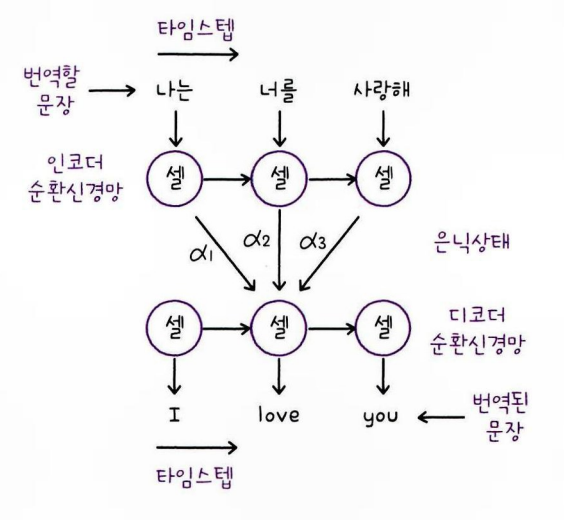

트랜스포머: 인코더는 입력된 텍스트를 한 번에 모두 처리함, 타임스텝X

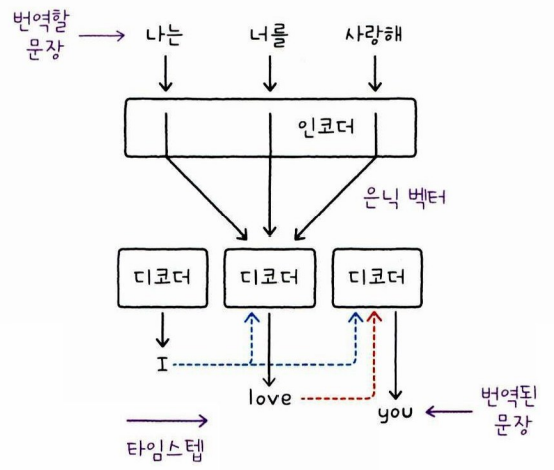

셀프어텐션

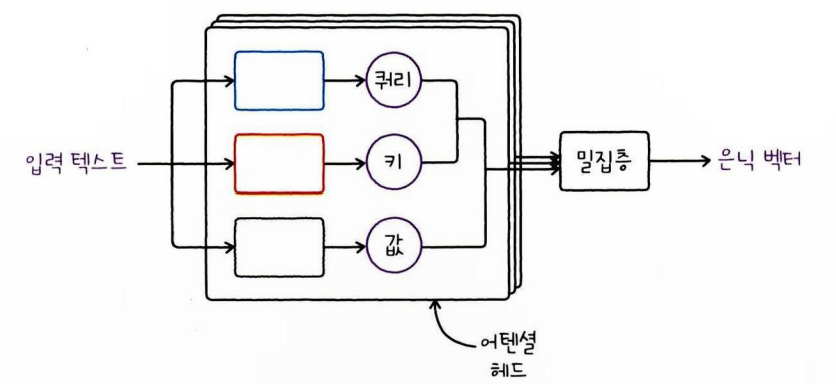

데이터 정규화 = standardscaler

배치 정규화 = 이전 층의 출력을 batch 단위로 평균과 분산을 계산하여 평균0, 분산 1 되도록 조정
딥러닝에서는 여러개의 층을 거치면서 특성 스케일이 변할 수 있음, 배치 정규화 필요!

층 정규화 = 각 샘플의 토큰마다 개별적으로 정규화 수행, 텍스트 데이터는 샘플마다 길이가 다르기때문에 고안된 방식

멀티헤드 어텐션과 층 정규화 사이에는 잔차 연결(스킵 연결)이 추가됨. 

잔차연결: 멀티헤드 어텐션 층을 거친 출력에 입력값을 그대로 더함

-> 신경망 층의 파라미터 업데이트 신호는 결과에서부터 거꾸로 내려오는데, 잔차연결이 추가되면 이 신호가 직접 앞쪽으 층으로 전달될 수 있음. 즉 신경망 층을 깊게 쌓아도 효과적으로 훈련 및 업데이트 가능해짐

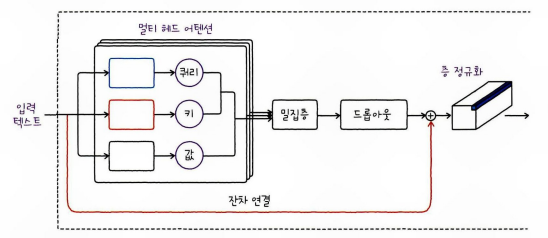

피드 포워드 네트워크와 인코더 블록

피드포워드 신경망에는 합성곱 신경망, 완전 연결 신경망, 트랜스포머 포함됨

피드포워드 네트워크와 피드포워드 신경망은 다른 말

피드포워드 네트워크는 보통 두 개의 밀집층으로구성되어, 첫 번재 밀집층은 ReLU 활성화 함수 사용, 두번째 밀집층은 활성화 함수를 사용하지 않음

토큰임베딩 - 토큰을 동시처리 하기 때문에 위치 고려하지 않는다는 문제 발생

위치임베딩 - 위치 인코딩(사인 코사인 함수로 토큰의 위치에 따라 변하는 벡터 생성, 이를 단어 임베딩에 더함)

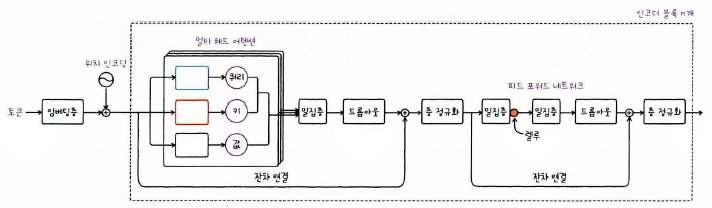

디코더 블록

인코더가 출력한 임베딩 벡터를 입력으로 받는 멀티헤드 어텐션,, 디코더에서 받은 벡터를 퀴리로 사용하고 인코더의 출력을 키와 값으로 사용, 크로스 

디코더는 자귀 회귀 모델의 방식을 따라 한 번의 하나의 토큰만 생성, 

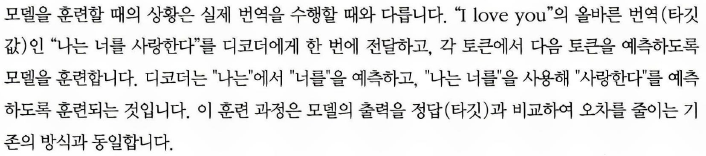

그러나 디코더가 정답을 알게되면 올바른 학습X, 그래서 디코더의 첫번쨰 멀티헤드 어텐션 층에는 마스킹 처리! 즉 이후의 토큰은 볼 수 없도록 제한, -> 마스크드 멀티 헤드어텐션

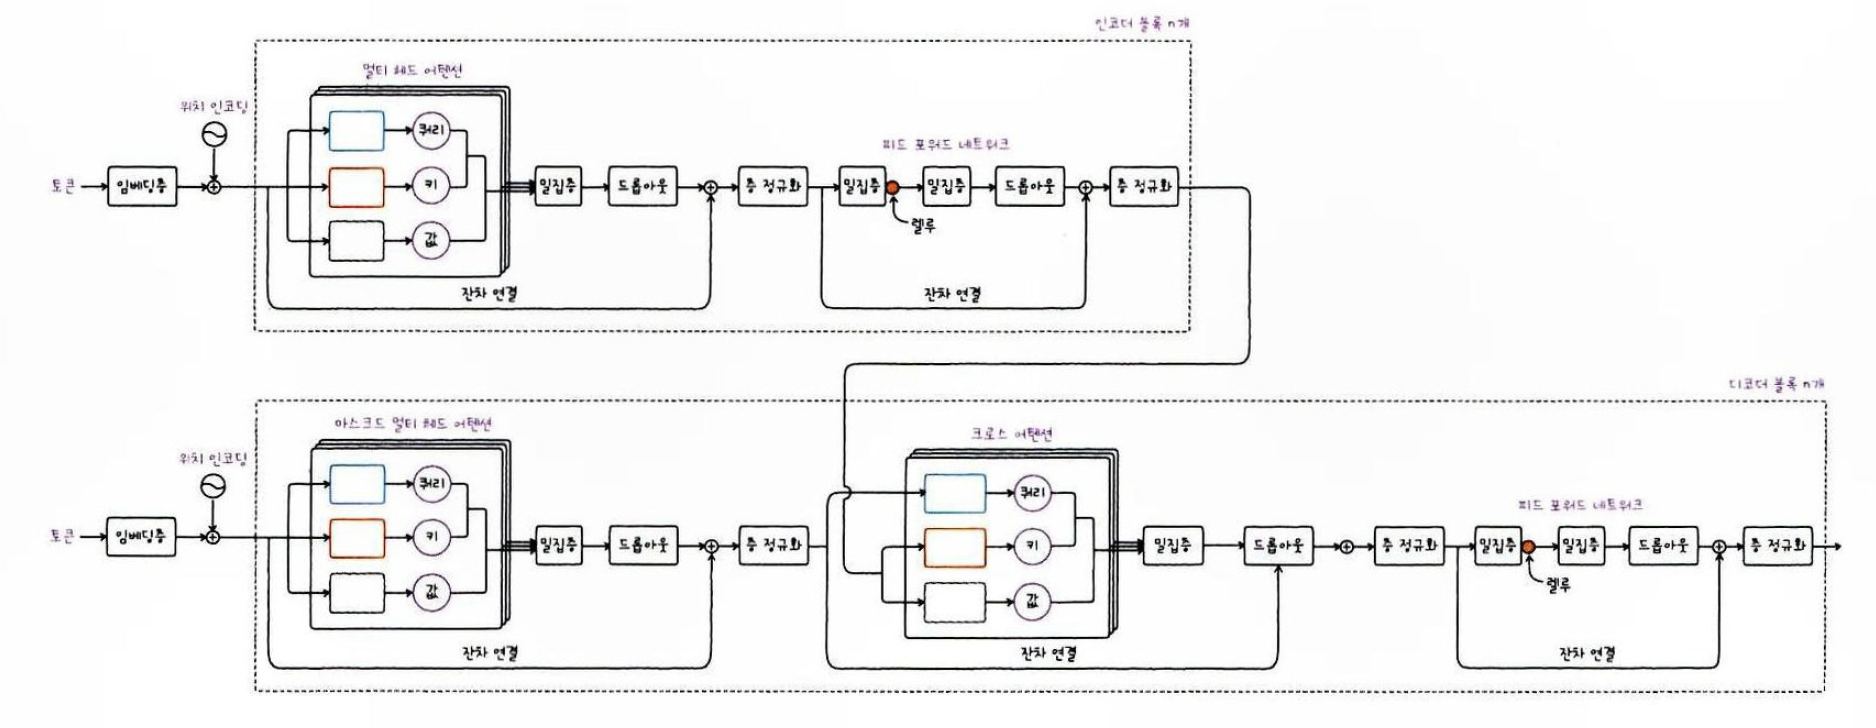

트랜스포머 모델

- 대규모 텍스트 데이터셋을 학습하며 매우 많은 파라미터 가지고 있음, 이를 대규모 언어모델 LLM이라 부름!
- 이런 모델을 훈련하기 위해서는 많은 자원과 비용이 필요함 > 이미 훈련된 모델 가져다 사용하는 방법 있음!
- 이번 장에서는 미리 훈련된 트랜스포머 모델을 활용해 텍스트 요약 작업 수행